In [1]:
import pandas as pd
import datetime

In [24]:
dt = pd.read_csv('C:\\Users\\Admin\\Documents\\Github\\Maga\\datasets\\COVID_Data_Small.csv', delimiter=';', decimal=',')
dt

,Arrival_Date,AgeYears,Temperature,BMI,AvgReading_Neuts_pct,Respiration_Rate,HasConnectiveTissueDisorderFLG,O2_Saturation,MaleFLG,Outcome_48Hours_Dispo,Rand
0,2020-05-28,75.8,98.0,36.3,75.6,98,1,99,1,0,0.055920
1,2020-03-10,0.9,102.0,34.6,71.2,70,0,98,0,1,0.112461
2,2020-05-29,61.1,97.5,25.3,68.4,61,1,99,1,0,0.031409
3,2020-05-11,56.2,97.9,30.3,96.5,56,0,98,1,1,0.720525
4,2020-06-19,41.9,97.0,34.1,53.7,56,0,100,0,0,0.047407
...,...,...,...,...,...,...,...,...,...,...,...
5999,2020-06-30,68.0,97.4,27.3,58.4,8,0,98,1,0,0.046645
6000,2020-05-14,67.8,98.2,29.9,85.7,8,0,98,1,0,0.067205
6001,2020-06-08,63.6,95.3,31.7,60.2,7,0,98,1,0,0.049975
6002,2020-05-07,50.9,93.8,26.6,79.0,0,0,100,0,1,0.167167


In [25]:
dt['Arrival_Date'] = pd.to_datetime(dt.Arrival_Date)

In [115]:
dt.dtypes

Arrival_Date                      datetime64[ns]
AgeYears                                 float64
Temperature                              float64
BMI                                      float64
AvgReading_Neuts_pct                     float64
Respiration_Rate                           int64
HasConnectiveTissueDisorderFLG             int64
O2_Saturation                              int64
MaleFLG                                    int64
Outcome_48Hours_Dispo                      int64
Rand                                     float64
dtype: object

# Question 8

In [106]:
d = datetime.now()

In [109]:
import os
i = 0
min_age = None
for root, d_names, f_names in os.walk(Path.cwd() / 'Clinical_HL7_Samples'):
    for f in f_names:
        fil = open(root + '\\' + f, 'r')
        has_m, has_d = False, False
        for seg in fil:
            if seg.startswith('MSH')==True:
                msg_date = seg.split('|')[6]
                if len(msg_date) >= 8:
                    md0 = datetime.strptime(msg_date[:8],'%Y%m%d')
                    has_m = True
            if seg.startswith('PID')==True:
                date, sex = seg.split('|')[7:9]
                if len(date) == 8 and sex == 'M':
                    d0 = datetime.strptime(date, '%Y%m%d')
                    if has_m:
                        age = md0 - d0
                        if min_age is None or age < min_age:
                            min_age = age
                            d = d0
        fil.close()

print(d)

2012-03-25 00:00:00


# Question 9

In [121]:
from sklearn.tree import DecisionTreeClassifier,plot_tree


In [111]:
model = DecisionTreeClassifier(max_depth=2)

In [142]:
X = dt.drop(['Outcome_48Hours_Dispo','Arrival_Date', 'Rand', 'AgeYears', 'Temperature', 'BMI'], axis=1)
y = dt['Outcome_48Hours_Dispo']

In [143]:
model.fit(X,y)

DecisionTreeClassifier(max_depth=2)

[Text(0.5, 0.8333333333333334, 'x[0] <= 73.15\ngini = 0.477\nsamples = 6004\nvalue = [3647, 2357]'),
 Text(0.25, 0.5, 'x[1] <= 19.5\ngini = 0.407\nsamples = 3186\nvalue = [2280, 906]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.366\nsamples = 2092\nvalue = [1588, 504]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.465\nsamples = 1094\nvalue = [692, 402]'),
 Text(0.75, 0.5, 'x[1] <= 25.5\ngini = 0.5\nsamples = 2818\nvalue = [1367, 1451]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.5\nsamples = 2458\nvalue = [1264, 1194]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.409\nsamples = 360\nvalue = [103, 257]')]

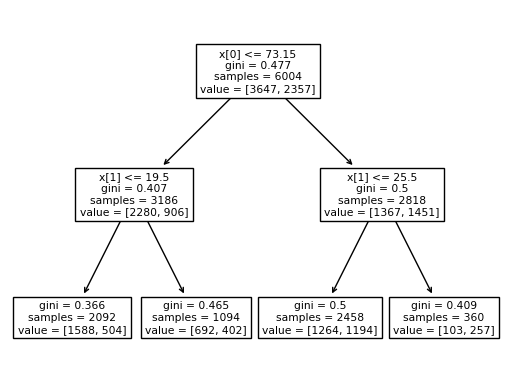

In [144]:
plot_tree(model)

In [145]:
X.columns

Index(['AvgReading_Neuts_pct', 'Respiration_Rate',
       'HasConnectiveTissueDisorderFLG', 'O2_Saturation', 'MaleFLG'],
      dtype='object')